<a href="https://colab.research.google.com/github/shashwat-2077/ComputerVisionWeek_AI/blob/main/Cartoonification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cartoonification Mini Project

## ImportinImporting the Necessary Libraries

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## MountinMounting the gdrive so that i can import the image from it

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading Image and Converting into required format

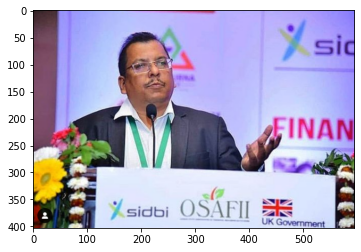

In [12]:
img = cv2.imread("/content/drive/MyDrive/Code/CV Week/jugal.png")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

## Identifying Edges

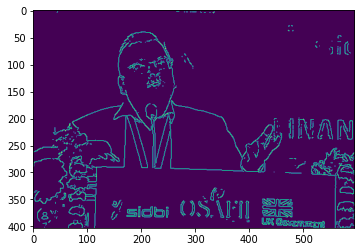

In [13]:
edges = cv2.Canny(imgRGB, 300, 300)
plt.imshow(edges)

## Applying median blur to obtain edges of even density and continuity

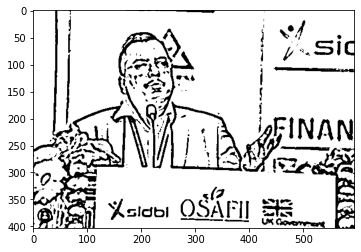

In [14]:
gray = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)
gray1 = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)
plt.imshow(edges, cmap='gray')

## Magic Function - Color Quantization

In [15]:
def color_quantization(img, k):
    data = np.float32(img).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

## Quantized Image with discrete color patterns

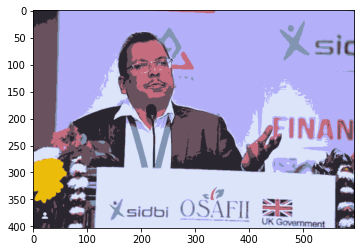

In [16]:
img_1 = color_quantization(imgRGB, 7)
plt.imshow(img_1)

## Smoothening sharp region tranistion

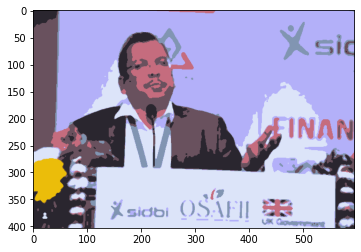

In [17]:
blurred = cv2.medianBlur(img_1, 5)
plt.imshow(blurred)

## Finally, Adding the Edges to complete the cartoonification

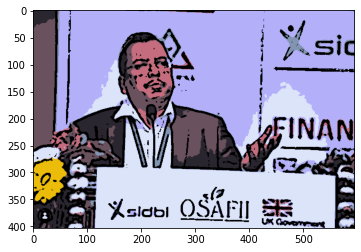

In [18]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
plt.imshow(cartoon)

## Another interesting approach to displaying images

-> cv2.imshow("Preview", img)
-> It creates a new window for every image displayed
-> Perks: Easier to save images
-> Limitation: Only 1 window at a time can be processed

In [19]:
#cartoon = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)
#cv2.imwrite("Output Image/AmyOP.jpeg", cartoon)